In [13]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler

## Get Data

In [14]:
x = np.arange(10).reshape(-1, 1)
y = np.array([0, 0, 0, 0, 1, 1, 1, 1, 1, 1])

## Standardize Data

In [15]:
scaler = StandardScaler()
x = scaler.fit_transform(x)

## Create Model and Train it

In [16]:
model = LogisticRegression(solver='liblinear', random_state=0).fit(x, y)

## Evaluate Model

In [17]:
print(f"Predict_proba: {model.predict_proba(x)}")
print(f"Predict: {model.predict(x)}")
print(f"Score: {model.score(x, y)}")

Predict_proba: [[0.86529258 0.13470742]
 [0.79647451 0.20352549]
 [0.70450536 0.29549464]
 [0.59225291 0.40774709]
 [0.46947003 0.53052997]
 [0.350275   0.649725  ]
 [0.24723957 0.75276043]
 [0.16673474 0.83326526]
 [0.10865958 0.89134042]
 [0.06913423 0.93086577]]
Predict: [0 0 0 0 1 1 1 1 1 1]
Score: 1.0


### Confusion Matrix

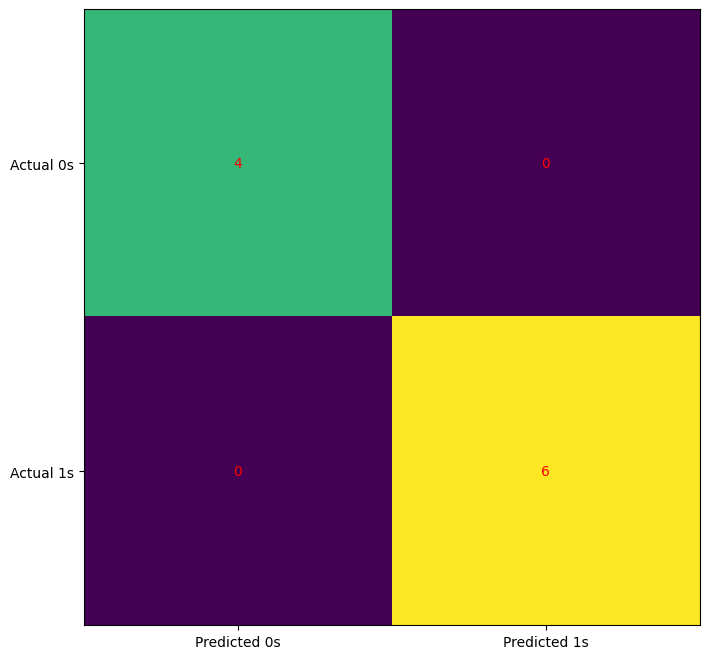

In [18]:
cm = confusion_matrix(y, model.predict(x))

fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='red')
plt.show()

## Graph

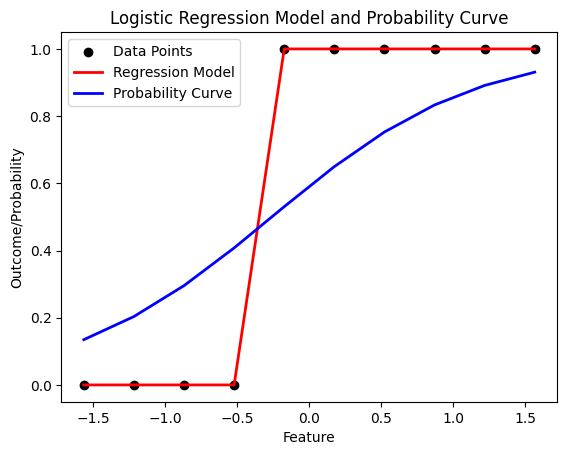

In [21]:
plt.scatter(x, y, color='black', label='Data Points')  # Plotting the data points
plt.plot(x, model.predict(x), color='red', linewidth=2, label='Regression Model')  # Regression model
plt.plot(x, model.predict_proba(x)[:, 1], color='blue', linewidth=2, label='Probability Curve')  # Probability curve
plt.title('Logistic Regression Model and Probability Curve')
plt.xlabel('Feature')
plt.ylabel('Outcome/Probability')
plt.legend()
plt.show()